In [171]:
!pip install xgboost 

In [172]:
import pandas as pd
import numpy as np
import xgboost as xgb

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [173]:
df_red = pd.read_csv(r"D:\Рабочий стол\Мэг_питон\ML\winequality-red.csv",
                      sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [174]:
df_white = pd.read_csv(r"D:\Рабочий стол\Мэг_питон\ML\winequality-white.csv",
                                                                     sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [175]:
df_red['target'] = 1
df_white['target'] = 0

In [176]:
# объединение датафреймов
df = pd.concat([df_red, df_white], axis = 0, ignore_index = True)
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
3929,7.5,0.38,0.29,12.70,0.050,25.0,209.0,0.99860,3.25,0.59,9.3,6,0
4214,6.5,0.18,0.41,14.20,0.039,47.0,129.0,0.99678,3.28,0.72,10.3,7,0
2721,6.6,0.25,0.39,1.45,0.040,40.0,89.0,0.99110,3.35,0.40,11.4,7,0
3090,7.5,0.20,0.49,1.30,0.031,8.0,97.0,0.99180,3.06,0.62,11.1,5,0
594,7.9,0.72,0.17,2.60,0.096,20.0,38.0,0.99780,3.40,0.53,9.5,5,1


In [177]:
df.isna().sum() # пропусков нет

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  target                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [179]:
df.target.value_counts() # 1(красное вино) - 24.6, 0(белое) - 75.4%

target
0    4898
1    1599
Name: count, dtype: int64

In [180]:
features = df.drop(['target'], axis=1)
target = df['target']

In [181]:
# разделение данных на обучающую и тестовую части
features_train, features_test, target_train, target_test =      train_test_split (features, target, shuffle=True, test_size=0.3,random_state=42)

2. Balanced_accuracy_score

In [182]:
def balanced_accuracy_score_my(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    balanced_accuracy = (tp/(tp+fn) + tn/(tn+fp))/2
    return balanced_accuracy
# создание функции сбалансированной точности

In [183]:
y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]
print(balanced_accuracy_score_my(y_true, y_pred))
print(balanced_accuracy_score(y_true, y_pred))

0.6071428571428572
0.6071428571428572


Функция реализована верно, показания совпадают с библиотечной

3. Дерево решений

Text(0, 0.5, '(Balanced_Accuracy_Score')

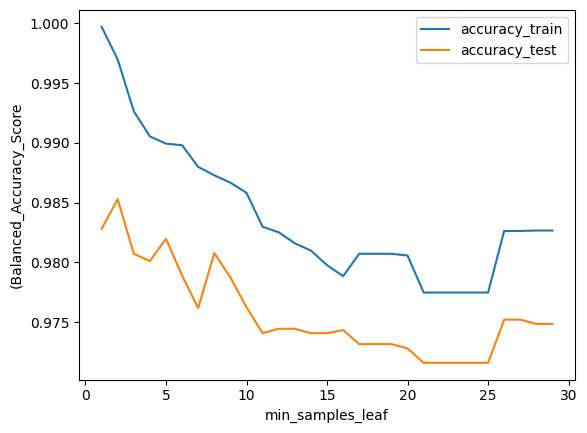

In [184]:
res = []
for param in range(1, 30, 1):
    model = DecisionTreeClassifier(min_samples_leaf=param, random_state=42)

    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)

    res.append([param, balanced_accuracy_score(pred_train, target_train),
                        balanced_accuracy_score(pred_test, target_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'accuracy_train',
                                    'accuracy_test'])

res_pd.set_index('min_samples_leaf')['accuracy_train'].plot(label='accuracy_train')
res_pd.set_index('min_samples_leaf')['accuracy_test'].plot(label='accuracy_test')
plt.legend()
plt.ylabel('(Balanced_Accuracy_Score')

In [185]:
# нахождение наилучшего значения
res_pd[res_pd['accuracy_test'] == res_pd['accuracy_test'].max()]

,min_samples_leaf,accuracy_train,accuracy_test
1,2,0.996975,0.985294


Ошибка на тестовой выборке чуть больше ошибки на обучающей, но предсказывает практически идеально (при минимальном количестве объектов в листе = 2)

4. Случайный лес

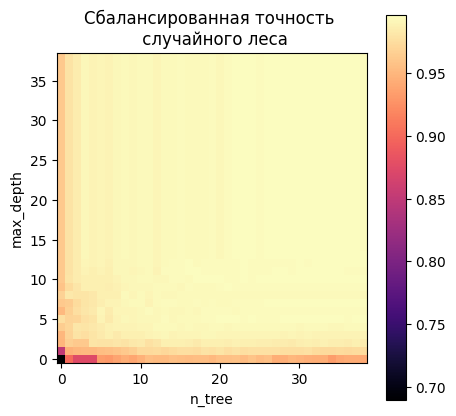

In [186]:
# перебор гиперпараметров количества деревьев и глубины
res = []
for max_depth in range(1, 40):
    for n_tree in range(1, 40):
        model = RandomForestClassifier(n_estimators = n_tree, max_depth =
                                       max_depth, min_samples_leaf=2,                  random_state=42)

        model.fit(features_train, target_train)
        pred_train = model.predict(features_train)
        pred_test = model.predict(features_test)

        res.append([max_depth, n_tree, balanced_accuracy_score(pred_train,
         target_train), balanced_accuracy_score(pred_test, target_test)])
    
    res_pd = pd.DataFrame(res, columns=['max_depth', 'n_tree',
                          'accuracy_train', 'accuracy_test'])

plt.figure(figsize=(5,5))
plt.imshow(res_pd.pivot(index = 'max_depth', columns = 'n_tree', values =
                        'accuracy_test'), cmap='magma', aspect='equal',
                         origin="lower")
plt.xlabel('n_tree')
plt.ylabel('max_depth')
plt.title('Сбалансированная точность \n случайного леса')
plt.colorbar()
plt.show()

In [187]:
res_pd[res_pd['accuracy_test'] == res_pd['accuracy_test'].max()]
# лучшая модель случайного леса

,max_depth,n_tree,accuracy_train,accuracy_test
304,8,32,0.997662,0.996241


Наилучшее качество модели случайного леса при максимальной глубине = 8, кол-во деревьев = 32

5. Градиентный бустинг

In [188]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(features_train, target_train, test_size=0.15, random_state=42)

Ошибка balanced на обучающей выборке:                   0.9992764109985528
Ошибка balanced на валидационной выборке:           0.9935082338850509


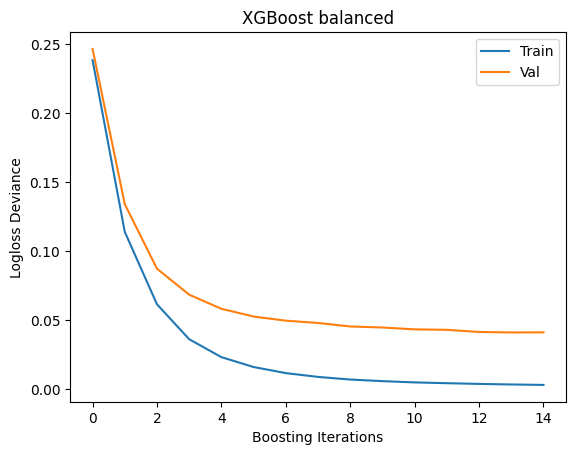

In [189]:
model = XGBClassifier(n_estimators=15, max_depth=6, learning_rate=0.7)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb,
                target_train_xgb), (features_val, target_val)], verbose=False)
pred_test = model.predict(features_test)

print(f'Ошибка balanced на обучающей выборке:                   {balanced_accuracy_score(pred_train, target_train)}')
print(f'Ошибка balanced на валидационной выборке:           {balanced_accuracy_score(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['logloss'], label='Val')

plt.title('XGBoost balanced')
plt.xlabel("Boosting Iterations")
plt.ylabel("Logloss Deviance")
plt.legend(loc="upper right")

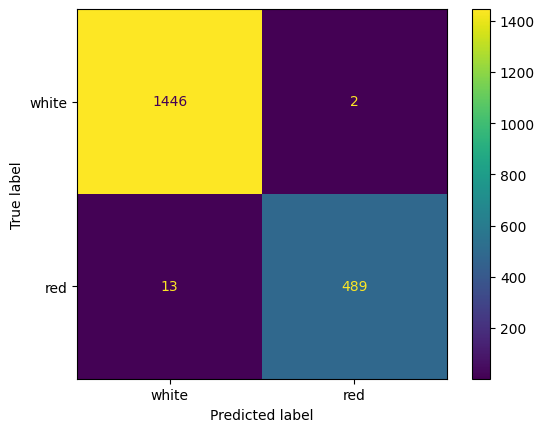

In [190]:
ConfusionMatrixDisplay(confusion_matrix(target_test, pred_test), 
                       display_labels=['white', 'red']).plot()
# визуализация матрицы ошибок

Ошибка balanced на обучающей выборке:               0.9992764109985528
Ошибка balanced на валидационной выборке:           0.9941967225438917


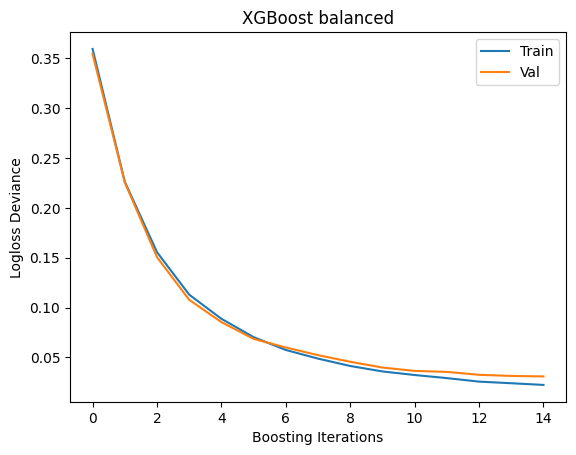

In [191]:
model = XGBClassifier(n_estimators=15, max_depth=2, learning_rate=0.5)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb,
                target_train_xgb), (features_val, target_val)], verbose=False)
pred_test = model.predict(features_test)

print(f'Ошибка balanced на обучающей выборке:               {balanced_accuracy_score(pred_train, target_train)}')
print(f'Ошибка balanced на валидационной выборке:           {balanced_accuracy_score (pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['logloss'], label='Val')

plt.title('XGBoost balanced')
plt.xlabel("Boosting Iterations")
plt.ylabel("Logloss Deviance")
plt.legend(loc="upper right")

Ошибка balanced на обучающей выборке:               0.9992764109985528
Ошибка balanced на валидационной выборке:              0.9952114490280706


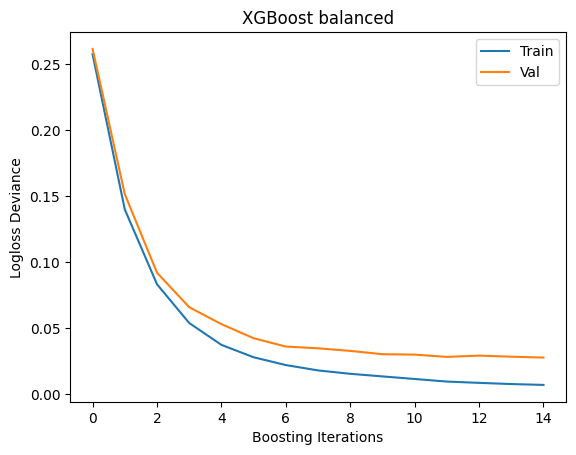

In [192]:
model = XGBClassifier(n_estimators=15, max_depth=3, learning_rate=0.7)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb,
                target_train_xgb), (features_val, target_val)], verbose=False)
pred_test = model.predict(features_test)

print(f'Ошибка balanced на обучающей выборке:               {balanced_accuracy_score(pred_train, target_train)}')
print(f'Ошибка balanced на валидационной выборке:              {balanced_accuracy_score (pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['logloss'], label='Val')

plt.title('XGBoost balanced')
plt.xlabel("Boosting Iterations")
plt.ylabel("Logloss Deviance")
plt.legend(loc="upper right")

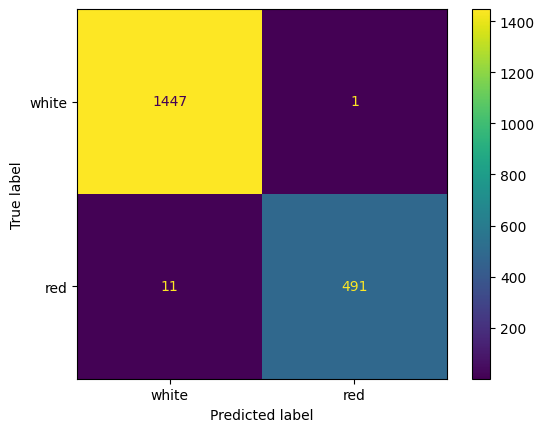

In [193]:
ConfusionMatrixDisplay(confusion_matrix(target_test, pred_test), 
                       display_labels=['white', 'red']).plot()
# визуализация матрицы ошибок

Оптимизировали параметры и получили лучшую модель с практически идеальными предсказаниями

Ошибка balanced на обучающей выборке:               0.9992764109985528
Ошибка balanced на валидационной выборке:           0.9952114490280706


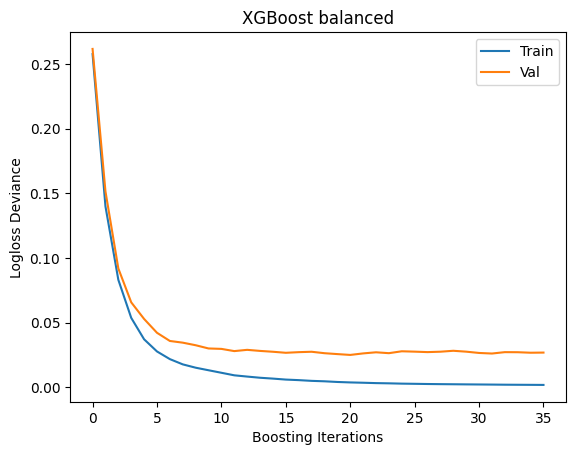

In [194]:
# увеличим количество деревьев и установим раннюю остановку
model = XGBClassifier(n_estimators=150, max_depth=3, learning_rate=0.7,
                      early_stopping_rounds = 15)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb,
             target_train_xgb), (features_val, target_val)], verbose=False)
pred_test = model.predict(features_test)

print(f'Ошибка balanced на обучающей выборке:               {balanced_accuracy_score(pred_train, target_train)}')
print(f'Ошибка balanced на валидационной выборке:           {balanced_accuracy_score(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['logloss'], label='Val')

plt.title('XGBoost balanced')
plt.xlabel("Boosting Iterations")
plt.ylabel("Logloss Deviance")
plt.legend(loc="upper right")

После кол. деревьев = 35 при фиксированных показателях макс глубины = 3 и скоростью обучения = 0.7, происходит вхождение в переобучение и ранняя остановка

Ошибка balanced на обучающей выборке:               0.9992764109985528
Ошибка balanced на валидационной выборке:           0.9901246134976841


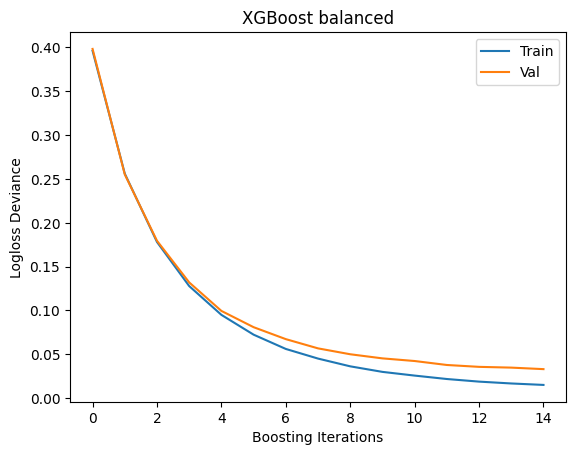

In [195]:
# Уменьшим скорость обучения при прежнем кол-ве деревьев
model = XGBClassifier(n_estimators=15, max_depth=3, learning_rate=0.4)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb,
                 target_train_xgb), (features_val, target_val)], verbose=False)
pred_test = model.predict(features_test)

print(f'Ошибка balanced на обучающей выборке:               {balanced_accuracy_score(pred_train, target_train)}')
print(f'Ошибка balanced на валидационной выборке:           {balanced_accuracy_score(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['logloss'], label='Val')

plt.title('XGBoost balanced')
plt.xlabel("Boosting Iterations")
plt.ylabel("Logloss Deviance")
plt.legend(loc="upper right")

Ошибка balanced на обучающей выборке:               0.9992764109985528
Ошибка balanced на валидационной выборке:           0.9962407580964282


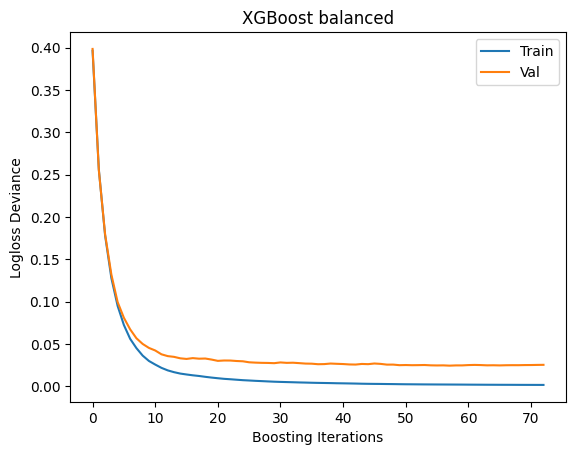

In [196]:
model = XGBClassifier(n_estimators=150, max_depth=3, learning_rate=0.4,
                                         early_stopping_rounds = 15)

model.fit(features_train_xgb, target_train_xgb, eval_set=[(features_train_xgb,
                 target_train_xgb), (features_val, target_val)], verbose=False)
pred_test = model.predict(features_test)

print(f'Ошибка balanced на обучающей выборке:               {balanced_accuracy_score(pred_train, target_train)}')
print(f'Ошибка balanced на валидационной выборке:           {balanced_accuracy_score(pred_test, target_test)}')

epochs = len(model.evals_result()['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model.evals_result()['validation_0']['logloss'], label='Train')
ax.plot(x_axis, model.evals_result()['validation_1']['logloss'], label='Val')

plt.title('XGBoost balanced')
plt.xlabel("Boosting Iterations")
plt.ylabel("Logloss Deviance")
plt.legend(loc="upper right")

Ранняя остановка происходит после 70 деревьев, повысилась точность на валидационной выборке

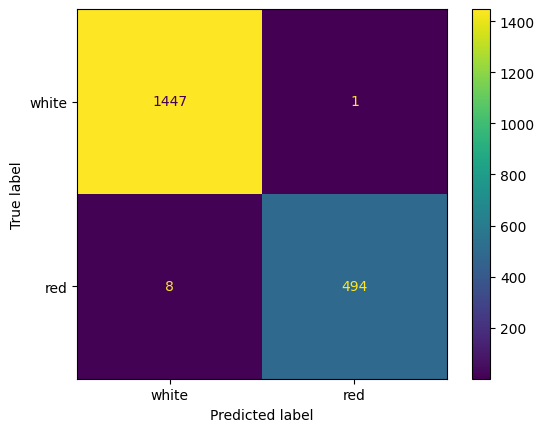

In [197]:
ConfusionMatrixDisplay(confusion_matrix(target_test, pred_test),    display_labels=['white', 'red']).plot()
# визуализация матрицы ошибок

1. При уменьшении скорости обучения(с 0.7 до 0.4) и увеличении кол. деревьев - ошибка на вал. стала чуть меньше (с 0.995 до 0.996)
2. Т.е при использ early_stopping_rounds мы можем увидеть максимум модели до переобучения

**6. Вывод**  
- Наивысшие результаты получены при применении метода `Случайный лес`  
Качество на тестовой выборке - 0.996, трен. - 0.998 (max_depth = 8,	n_tree = 32)
- `Дерево решений`  
Качество на тестовой выборке - 0.985, трен. - 0.996 (min_samples_leaf = 2)  
- `Градиентный бустинг`  
Качество на тестовой выборке - 0.982, трен. - 0.995 (n_estimators=15, max_depth=3, learning_rate=0.7)